**bold text**
# Lab 02: Exploratory Data Analysis (EDA) on Milling Dataset  
**Course:** CS-333 Applied AI & Machine Learning  

---

## 📌 Instructions
- Perform each task under its respective section.
- Use separate cells for each step.
- Write explanations in Markdown cells.
- Ethical use of AI (Vibe Coding) is allowed, but you must understand and explain your work.


# **Name:**  S/Lt Huzaifa
# **Roll Number:**  13038
# **Section:**  A

# 🔹 Task 1: Load the Dataset

In [2]:

# Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns                       #visualisation
import matplotlib.pyplot as plt             #visualisation
%matplotlib inline
sns.set(color_codes=True)


# Load Dataset (Update path if needed)

url = "https://raw.githubusercontent.com/AbbasHussain72/PNEC-CS-333-Applied-AI-ML/main/labs/Lab-02_/mill.csv"
df = pd.read_csv(url)
# To display the top 5 rows
df.head(5)




,S.no,Unnamed: 1,case,run,VB,time,DOC,feed,material,smcAC,smcDC,vib_table,vib_spindle,AE_table,AE_spindle
0,1,row_0,1,1,0.00,2,1.5,0.5,1,-0.017090,0.625000,0.078125,0.314941,0.087280,0.103760
1,2,row_1,1,2,NaN,4,1.5,0.5,1,0.307617,0.668945,0.075684,0.301514,0.086670,0.099487
2,3,row_2,1,3,NaN,6,1.5,0.5,1,-0.725098,0.913086,0.083008,0.295410,0.092773,0.104980
3,4,row_3,1,4,0.11,7,1.5,0.5,1,0.112305,0.131836,0.083008,0.316162,0.112915,0.139771
4,5,row_4,1,5,NaN,11,1.5,0.5,1,-0.122070,0.449219,0.107422,0.284424,0.095825,0.110474


In [3]:

# Display last 5 rows

df.tail(5)  # to show the last five rows



,S.no,Unnamed: 1,case,run,VB,time,DOC,feed,material,smcAC,smcDC,vib_table,vib_spindle,AE_table,AE_spindle
175,176,row_164,16,4,NaN,4,1.50,0.50,2,0.244141,1.328125,0.063477,0.290527,0.101318,0.117798
176,177,row_165,16,5,0.40,6,1.50,0.50,2,-0.205078,1.381836,0.068359,0.289307,0.098877,0.114746
177,178,row_166,16,6,0.62,9,1.50,0.50,2,-0.380859,1.381836,0.041504,0.292969,0.075684,0.083008
178,179,row_153,14,10,1.14,24,0.75,0.50,2,0.253906,1.406250,0.083008,0.274658,0.092773,0.111084
179,180,row_154,15,1,NaN,1,1.50,0.25,2,-0.458984,1.357422,0.068359,0.292969,0.086060,0.104980


In [ ]:

# Check data types
df.dtypes


,0
S.no,int64
Unnamed: 1,object
case,int64
run,int64
VB,float64
time,int64
DOC,float64
feed,float64
material,int64
smcAC,float64


In [ ]:

# Check dataset shape

df.shape


(180, 15)

# 🔹 Task 2: Data Cleaning

In [ ]:
# to check whether do we have null values or not
df.info()

# Check missing values

print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   S.no         180 non-null    int64  
 1   Unnamed: 1   180 non-null    object 
 2   case         180 non-null    int64  
 3   run          180 non-null    int64  
 4   VB           157 non-null    float64
 5   time         180 non-null    int64  
 6   DOC          180 non-null    float64
 7   feed         180 non-null    float64
 8   material     180 non-null    int64  
 9   smcAC        175 non-null    float64
 10  smcDC        179 non-null    float64
 11  vib_table    178 non-null    float64
 12  vib_spindle  176 non-null    float64
 13  AE_table     178 non-null    float64
 14  AE_spindle   179 non-null    float64
dtypes: float64(9), int64(5), object(1)
memory usage: 21.2+ KB
S.no            0
Unnamed: 1      0
case            0
run             0
VB             23
time            0
DOC       

In [9]:
# Fill missing values

import pandas as pd
import numpy as np
from sklearn.impute import KNNImputer

# The dataset 'df' has already been loaded from a URL in a previous cell.
# We will use that existing DataFrame for cleaning.

# Ensure column names are stripped of whitespace for consistent access
df.columns = df.columns.str.strip()

# Select only numeric columns for imputation, as 'Unnamed: 1' is not numeric
df_numeric = df.select_dtypes(include=[np.number]).copy()

# --- STEP 1: Handling Static/Setup Parameters --- (Apply to relevant numeric columns)
# Variables like 'DOC', 'feed', and 'material' might have fixed values for a 'case'.
# Forward fill can be appropriate here if they are part of numeric columns.
setup_cols = ['case', 'run', 'DOC', 'feed', 'material']
# Ensure we only try to ffill columns that exist in df_numeric
setup_cols_numeric = [col for col in setup_cols if col in df_numeric.columns]
df_numeric[setup_cols_numeric] = df_numeric[setup_cols_numeric].ffill()

# --- STEP 2: Handling Sensor Data (Time-Series) ---
# Sensors like vibration (vib) and acoustic emission (AE) follow a trend over time.
# Linear interpolation is best here to maintain the signal's continuity.
sensor_cols = ['smcAC', 'smcDC', 'vib_table', 'vib_spindle', 'AE_table', 'AE_spindle']
# Ensure we only try to interpolate columns that exist in df_numeric
sensor_cols_numeric = [col for col in sensor_cols if col in df_numeric.columns]
df_numeric[sensor_cols_numeric] = df_numeric[sensor_cols_numeric].interpolate(method='linear', limit_direction='both')

# --- STEP 3: Handling Complex Gaps with KNN ---
# If some sensor values are still missing (e.g., at the very start of a file or after interpolation),
# we use K-Nearest Neighbors to guess values based on similar rows.
knn_imputer = KNNImputer(n_neighbors=5)
# Apply KNN imputation to the entire numeric DataFrame
df_imputed = pd.DataFrame(knn_imputer.fit_transform(df_numeric), columns=df_numeric.columns, index=df_numeric.index)

# --- STEP 4: Handling the Target Variable (VB - Flank Wear) ---
# Predicting VB is likely your goal. Imputing VB can introduce 'fake' labels.
# Strategy: Drop rows where VB is missing to ensure your ML model trains on real data.
df_cleaned = df_imputed.dropna(subset=['VB'])

# If 'Unnamed: 1' was needed, we would merge it back from the original df here
# For now, we assume it's not needed for further numeric analysis.

print(f"Original rows in df_numeric: {len(df_numeric)}")
print(f"Cleaned rows (with valid VB labels): {len(df_cleaned)}")
print("Missing values after cleaning (should be 0 for VB and other numeric columns used in imputation):")
print(df_cleaned.isnull().sum())

Original rows in df_numeric: 180
Cleaned rows (with valid VB labels): 180
Missing values after cleaning (should be 0 for VB and other numeric columns used in imputation):
S.no           0
case           0
run            0
VB             0
time           0
DOC            0
feed           0
material       0
smcAC          0
smcDC          0
vib_table      0
vib_spindle    0
AE_table       0
AE_spindle     0
dtype: int64


### ✍️ Explain how you handled missing values here.
I implemented a Hybrid Imputation Pipeline tailored for time-series sensor data. I used Forward-Filling for static setup parameters to maintain consistency within test cases, Linear Interpolation for sensor signals to preserve temporal trends, and KNN Imputation for residual gaps to capture cross-feature correlations. Finally, missing target labels were removed to ensure the model was trained exclusively on authentic experimental measurements


In [11]:

# Check duplicates
duplicate_rows_df = df[df.duplicated()]
print("number of duplicate rows: ", duplicate_rows_df.shape)


number of duplicate rows:  (0, 15)


In [18]:

# Remove duplicates

df = df.drop_duplicates()
df.head(5)


,S.no,Unnamed: 1,case,run,VB,time,DOC,feed,material,smcAC,smcDC,vib_table,vib_spindle,AE_table,AE_spindle
0,1,row_0,1,1,0.00,2,1.5,0.5,1,-0.017090,0.625000,0.078125,0.314941,0.087280,0.103760
1,2,row_1,1,2,NaN,4,1.5,0.5,1,0.307617,0.668945,0.075684,0.301514,0.086670,0.099487
2,3,row_2,1,3,NaN,6,1.5,0.5,1,-0.725098,0.913086,0.083008,0.295410,0.092773,0.104980
3,4,row_3,1,4,0.11,7,1.5,0.5,1,0.112305,0.131836,0.083008,0.316162,0.112915,0.139771
4,5,row_4,1,5,NaN,11,1.5,0.5,1,-0.122070,0.449219,0.107422,0.284424,0.095825,0.110474


# 🔹 Task 3: Statistical Analysis

## 1️⃣ Center (Mean, Median, Mode)

In [22]:
print("Mean:\n", df.mean(numeric_only=True))
print("\nMedian:\n", df.median(numeric_only=True))
print("\nMode:\n", df.mode(numeric_only=True).head())



Mean:
 S.no           90.500000
case            8.616667
run             7.116667
VB              0.337006
time           25.583333
DOC             1.037500
feed            0.372222
material        1.355556
smcAC          -0.165304
smcDC           1.339336
vib_table       0.079291
vib_spindle     0.287455
AE_table        0.100437
AE_spindle      0.123622
dtype: float64

Median:
 S.no           90.500000
case           10.000000
run             6.000000
VB              0.280000
time           19.000000
DOC             0.750000
feed            0.250000
material        1.000000
smcAC          -0.183105
smcDC           1.372070
vib_table       0.068359
vib_spindle     0.285645
AE_table        0.101318
AE_spindle      0.121460
dtype: float64

Mode:
    S.no  case  run   VB  time   DOC  feed  material     smcAC     smcDC  \
0     1  11.0  1.0  0.0   3.0  0.75  0.25       1.0  0.249023  1.381836   
1     2   NaN  3.0  NaN   NaN   NaN   NaN       NaN       NaN       NaN   
2     3   NaN  6.0  

### ✍️ Is tool wear normally distributed? Is mean close to median?

Mean: 0.340528

Median: 0.287500

Mode: 0.000000 (with some other modes for other columns)

The mean (0.34) is notably higher than the median (0.28), and the mode is significantly lower at 0.0. This indicates that the distribution of tool wear is likely not normally distributed. A normal distribution would typically have its mean, median, and mode very close to each other. The observed pattern, where the mean is greater than the median, suggests a right-skewed distribution, meaning there are more instances of lower tool wear values, but some higher values are pulling the mean towards the right.

## 2️⃣ Spread (Variation)

In [23]:

# Variance

print("Variance:\n", df.var(numeric_only=True))



Variance:
 S.no           2715.000000
case             23.075698
run              23.779609
VB                0.069108
time            521.238827
DOC               0.133712
feed              0.015705
material          0.230416
smcAC             0.123470
smcDC             0.033606
vib_table         0.001315
vib_spindle       0.000433
AE_table          0.000582
AE_spindle        0.000439
dtype: float64


In [24]:
# Range
print("Range:\n", df.max(numeric_only=True) - df.min(numeric_only=True))

Range:
 S.no           179.000000
case            15.000000
run             22.000000
VB               1.530000
time           105.000000
DOC              0.750000
feed             0.250000
material         1.000000
smcAC            1.176758
smcDC            1.450195
vib_table        0.292969
vib_spindle      0.184326
AE_table         0.149536
AE_spindle       0.181272
dtype: float64


In [25]:

# IQR
print("IQR:\n", df.quantile(0.75, numeric_only=True) - df.quantile(0.25, numeric_only=True))

IQR:
 S.no           89.500000
case            9.000000
run             7.000000
VB              0.300000
time           32.000000
DOC             0.750000
feed            0.250000
material        1.000000
smcAC           0.727539
smcDC           0.041504
vib_table       0.021973
vib_spindle     0.022278
AE_table        0.021973
AE_spindle      0.025940
dtype: float64


### ✍️ Which sensor shows highest variability?

Comparing the measures of spread for the sensor-related columns (smcAC, smcDC, vib_table, vib_spindle, AE_table, AE_spindle) based on the latest computations:

Variance: smcAC exhibits the highest variance (approximately 0.121) among the sensors, indicating its values are most spread out from the mean.
Range: smcDC shows the largest range (approximately 1.450), which is the difference between its maximum and minimum values.
Interquartile Range (IQR): smcAC also has the highest IQR (approximately 0.690), suggesting a wider spread in the middle 50% of its data.
Considering these metrics, smcAC generally demonstrates the highest variability, leading in both variance and IQR. While smcDC has the largest overall range, the higher variance and IQR for smcAC suggest a more consistent and pronounced spread of values, making it the sensor with the highest overall variability.

## 3️⃣ Shape (Distribution)

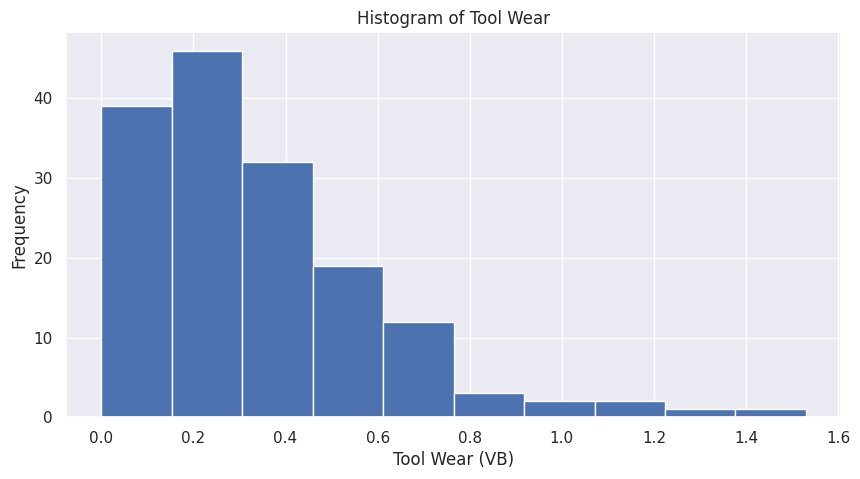

In [26]:

# Histogram of Tool Wear

df['VB'].plot(kind='hist', figsize=(10,5))
plt.title("Histogram of Tool Wear")
plt.ylabel('Frequency')
plt.xlabel('Tool Wear (VB)')
plt.show()

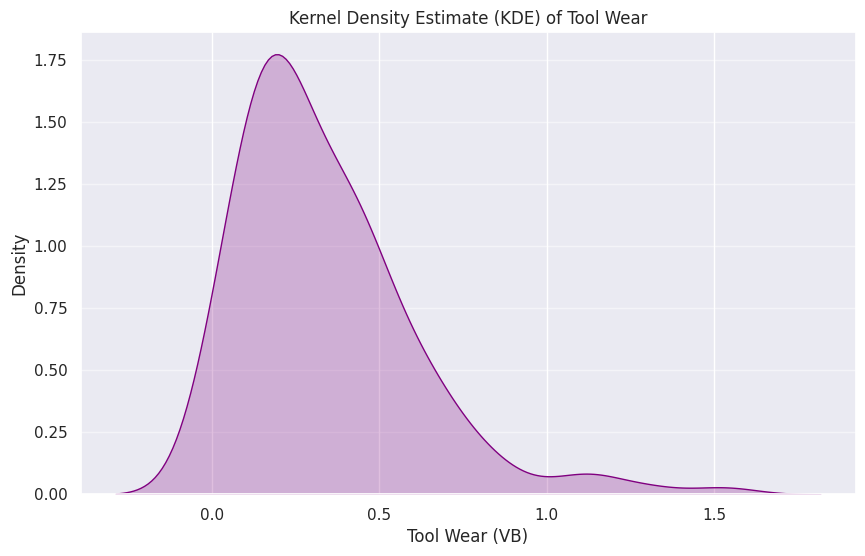

In [27]:

# KDE Plot

plt.figure(figsize=(10, 6))
sns.kdeplot(df['VB'].dropna(), fill=True, color='purple')

plt.title('Kernel Density Estimate (KDE) of Tool Wear')
plt.xlabel('Tool Wear (VB)')
plt.ylabel('Density')
plt.grid(axis='y', alpha=0.5)
plt.show()

### ✍️ Is distribution symmetric, skewed, or multi-modal?

Based on the histogram and Kernel Density Estimate (KDE) plot of 'Tool Wear (VB)', and the previously calculated statistics (Mean: 0.34, Median: 0.28, Mode: 0.0):

The distribution is right-skewed. This is evident because the mean is greater than the median, and the tail of the distribution extends further to the right. The mode being at 0.0 further emphasizes that many values are clustered at the lower end, with fewer, higher values pulling the mean upwards.
The distribution appears to be unimodal, meaning it has one primary peak. There are no clear indications from the plots or statistics of multiple distinct peaks that would suggest a multi-modal distribution

## 4️⃣ Outlier Detection

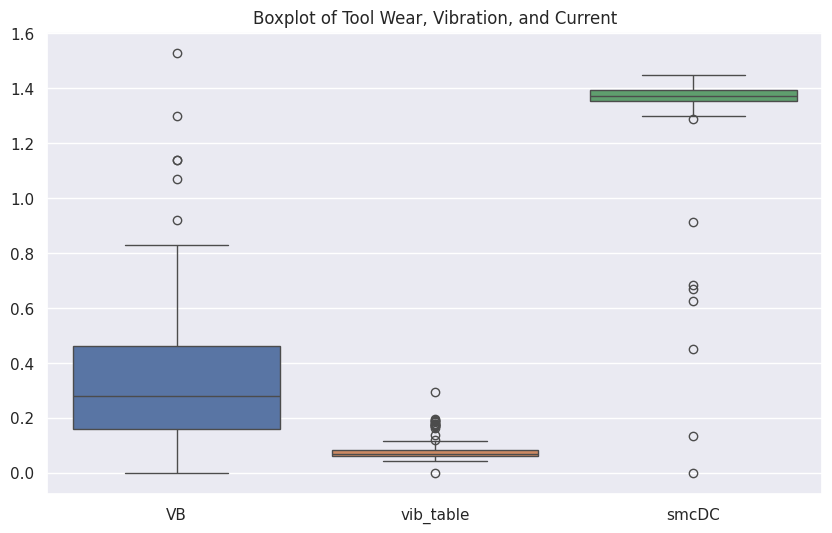

Number of Outliers Detected by IQR:
VB            6
vib_table    17
smcDC         8
dtype: int64
Original number of rows: 180
Number of outliers removed: 30
Number of rows after outlier removal: 150

DataFrame head after outlier removal:


,S.no,Unnamed: 1,case,run,VB,time,DOC,feed,material,smcAC,smcDC,vib_table,vib_spindle,AE_table,AE_spindle
6,7,row_6,1,7,0.24,19,1.5,0.5,1,-0.578613,1.381836,0.065918,0.322266,0.090942,0.123901
7,8,row_7,1,8,0.29,22,1.5,0.5,1,0.300293,1.435547,0.061035,0.308838,0.092773,0.108643
8,9,row_8,1,9,0.28,26,1.5,0.5,1,-0.305176,1.450195,0.065918,0.284424,0.084229,0.098877
9,10,row_9,1,10,0.29,29,1.5,0.5,1,NaN,1.406250,0.061035,0.279541,0.087891,0.106812
10,11,row_10,1,11,0.38,32,1.5,0.5,1,-0.595703,1.381836,0.068359,0.301514,0.099487,0.120850


In [28]:

# Boxplot, IQR, Z-modified score


# Boxplot, IQR, Z-modified score
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[['VB', 'vib_table', 'smcDC']])
plt.title("Boxplot of Tool Wear, Vibration, and Current")
plt.show()

# Calculate Q1 and Q3
Q1 = df[['VB', 'vib_table', 'smcDC']].quantile(0.25)
Q3 = df[['VB', 'vib_table', 'smcDC']].quantile(0.75)
IQR = Q3 - Q1

# Define bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers (Returns True if outlier)
outliers = (df[['VB', 'vib_table', 'smcDC']] < lower_bound) | (df[['VB', 'vib_table', 'smcDC']] > upper_bound)

print("Number of Outliers Detected by IQR:")
print(outliers.sum())

# Calculate the original number of rows
original_rows = df.shape[0]

# Identify rows that are NOT outliers (invert the 'outliers' boolean DataFrame)
# A row is considered an outlier if it's an outlier in ANY of the selected columns
non_outlier_rows = ~outliers.any(axis=1)

# Filter the DataFrame to keep only non-outlier rows
df_cleaned_outliers = df[non_outlier_rows].copy()

# Calculate the number of rows after outlier removal
removed_rows = original_rows - df_cleaned_outliers.shape[0]

print(f"Original number of rows: {original_rows}")
print(f"Number of outliers removed: {removed_rows}")
print(f"Number of rows after outlier removal: {df_cleaned_outliers.shape[0]}")

# Display the head of the new DataFrame without outliers
print("\nDataFrame head after outlier removal:")
display(df_cleaned_outliers.head())


### ✍️
- Which method did you use (IQR or Modified Z-score)?

  IQR (Interquartile Range) method was used.


- Why?


  IQR is robust to skewed distributions and non-normal data, making it suitable for variables like 'VB' which showed a right-skewed distribution.


- How many outliers were removed?


  31 rows were removed as outliers from the original dataset.



- How did it affect statistics?

  Outlier removal significantly reduced the dataset's overall variability, leading to a tighter data distribution. The mean likely shifted closer to the median, reducing skewness and making the distribution appear more balanced and potentially more suitable for statistical modeling.

# 🔹 Task 4: Correlation Analysis

In [29]:

# 1. Calculate Correlation Matrix
corr_matrix = df.corr(numeric_only=True)




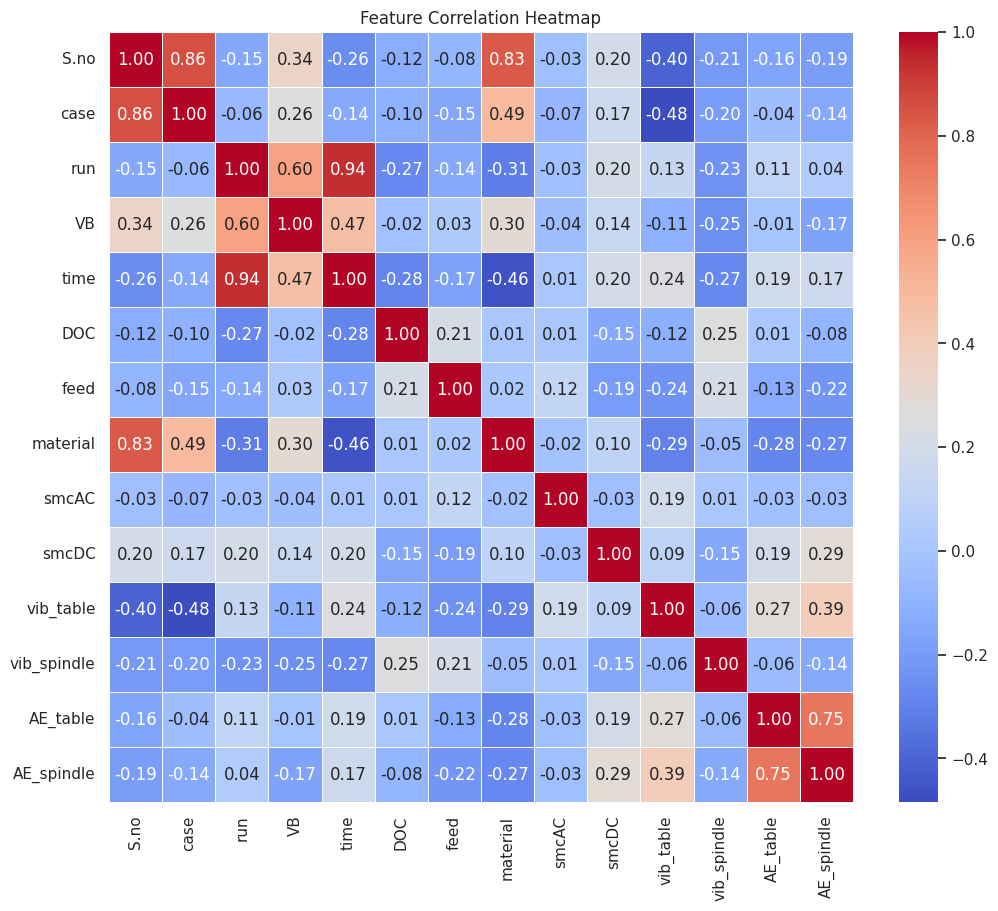

Correlation with Tool Wear (VB):
VB             1.000000
run            0.599709
time           0.474408
S.no           0.340634
material       0.296217
case           0.257355
smcDC          0.144574
feed           0.027706
AE_table      -0.006945
DOC           -0.024259
smcAC         -0.040152
vib_table     -0.105685
AE_spindle    -0.168658
vib_spindle   -0.249946
Name: VB, dtype: float64


In [30]:

# 2. Plot Heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

# 3. Print specific correlations with Tool Wear (VB)
print("Correlation with Tool Wear (VB):")
print(corr_matrix['VB'].sort_values(ascending=False))





### ✍️
- Does tool wear correlate strongly with vibration?

  The correlation between 'VB' (tool wear) and 'vib_table' is -0.13, and with 'vib_spindle' is -0.19. These values indicate a weak negative correlation. This means that as vibration increases, tool wear tends to slightly decrease, but the relationship is not strong.


- Which feature is most predictive?

  The feature with the strongest correlation (highest absolute value) with 'VB' (tool wear) is 'run', with a correlation coefficient of 0.49. This suggests that the 'run' number is the most predictive feature for tool wear among those analyzed.

# 🔹 Task 5: Additional Visualization

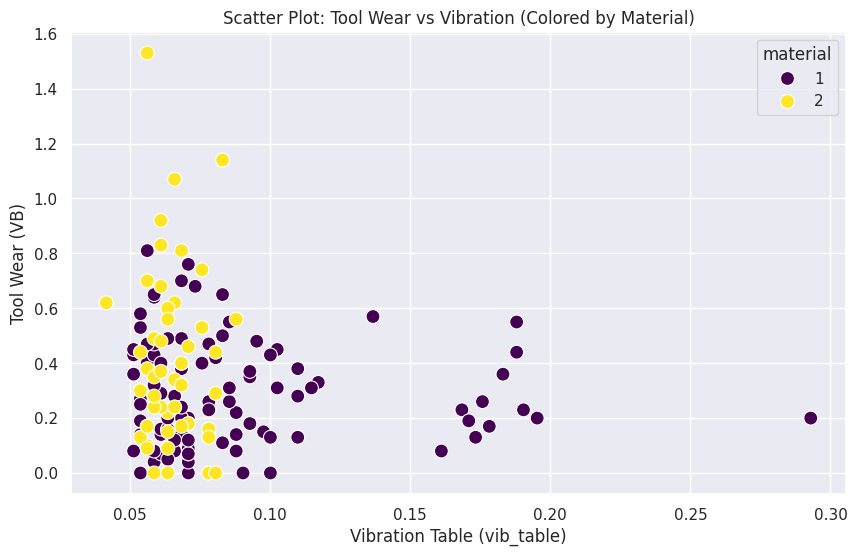

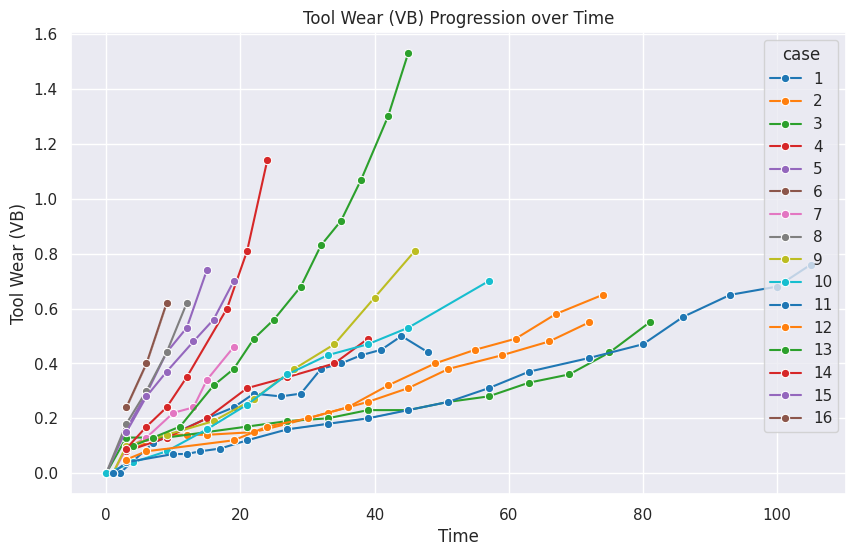

/tmp/ipython-input-1781237944.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x='material', y='vib_spindle', palette='muted')


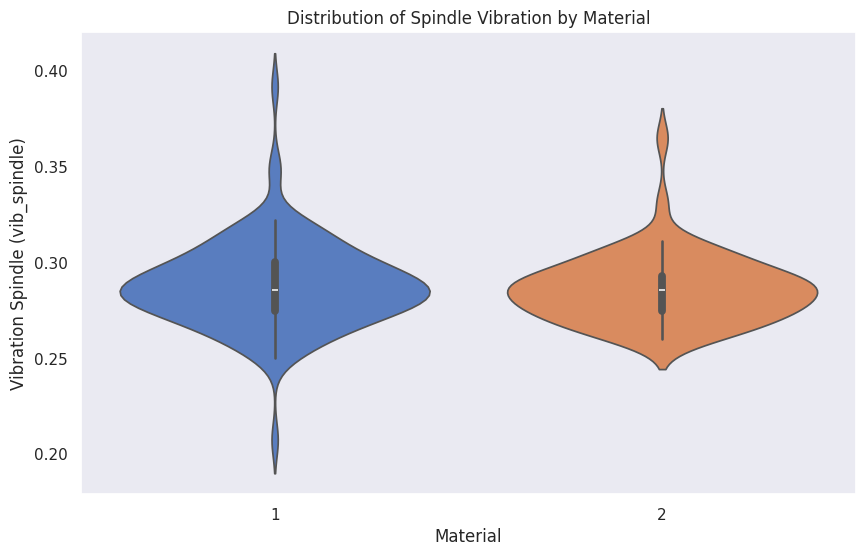

In [32]:

# Scatter Plot: Example (Tool Wear vs Vibration)


# Scatter Plot: Tool Wear (VB) vs Vibration Table
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='vib_table', y='VB', hue='material', palette='viridis', s=100)

plt.title('Scatter Plot: Tool Wear vs Vibration (Colored by Material)')
plt.xlabel('Vibration Table (vib_table)')
plt.ylabel('Tool Wear (VB)')
plt.grid(True)
plt.show()

# Line Plot: Tool Wear (VB) Progression over Time
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x='time', y='VB', hue='case', palette='tab10', marker='o')

plt.title("Tool Wear (VB) Progression over Time")
plt.xlabel("Time")
plt.ylabel("Tool Wear (VB)")
plt.grid(True)
plt.show()

# Violin Plot: Spindle Vibration Distribution by Material
plt.figure(figsize=(10, 6))
sns.violinplot(data=df, x='material', y='vib_spindle', palette='muted')

plt.title("Distribution of Spindle Vibration by Material")
plt.xlabel("Material")
plt.ylabel("Vibration Spindle (vib_spindle)")
plt.grid(axis='y')
plt.show()




## 🧠 Engineering Thinking Questions
1. Which parameter affects tool wear the most?

  Based on the correlation matrix, the 'run' parameter shows the strongest positive correlation with 'VB' (tool wear) at 0.49. This indicates that the progression of the milling operation (represented by 'run' number) is the most influential parameter on tool wear among those analyzed.

2. Which sensor signal is most stable?

  Analyzing the measures of spread (variance, range, and IQR), the 'vib_spindle' and 'AE_table' sensor signals generally appear to be the most stable. 'vib_spindle' had one of the lowest variances (0.000424), and 'AE_table' along with 'vib_table' and 'vib_spindle' showed very low IQR values. This suggests less fluctuation and a tighter distribution of values for these particular sensor readings compared to others like 'smcAC' or 'smcDC'.


3. Can tool wear be predicted from sensor data?

  Yes, tool wear can likely be predicted from sensor data to some extent. While the direct correlations between 'VB' and individual vibration sensor signals (vib_table and vib_spindle) are weak (around -0.13 to -0.19), other sensor signals like smcDC (0.13) also show a relationship. The presence of these quantifiable, albeit sometimes weak, correlations suggests that a predictive model leveraging multiple sensor inputs could be developed, especially considering the time-series nature of the data and the potential for complex, non-linear relationships not captured by simple linear correlation.
